# APS 2 - Aplicação de Método de Diferenças Finitas
Gabriel Onishi, Sarah Pimenta, Pedro Mahfuz <br>
5COMPA <br>
Disciplina: Transferência de Calor e Mecânica dos Sólidos <br>
___

Bibliotecas Utilizadas

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

## Definição do Problema

Dados do Exercício

In [23]:
# Dados do material:
rho = 2700                                  # densidade [kg/m^3]
cp = 896                                    # calor específico [J/kgK]
k = 180                                     # condutividade termica [W/mK]

# Dados do ambiente:
h = 50                                      # coef. de transferencia de calor por convecção [W/m^2K]
T_inf = 50                                  # temperatura ambiente [°C]

# Dados do dissipador:
T_base = 100                                # temperatura na extremidade x = 0 [°C]
T_L = 25                                    # temperatura na extremidade x = L [°C]
D = 5e-3                                    # diametro da aleta[m]
r = D/2                                     # raio da aleta [m]
L = 0.3                                     # compriemnto [m]
P = 2 * pi * r                              # perimetro [m]
Atr = pi * r**2                             # área secção trasnversal [m²]
alpha = k/(rho*cp)                          # difusidade térmica do material [m²/s]

# Dados do modelo numérico
t = 550                                     # tempo de simulação [s]
delta_x = 0.01                              # distancia entre os pontos no comprimento [m]

# Testando valor máximo para delta_t
cond = ((delta_x **2)/(alpha*(((h*P*(delta_x**2))/(k*Atr)) + 2))) * 0.9   # condição de estabilidade

print(f'O valor máximo para delta_t é: {cond}')
delta_t = 0.001

O valor máximo para delta_t é: 0.5981538461538461


___

### Questão 1

[4,0 pontos] Aplique os conceitos do método de diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações.

Forma geral da equação de energia para uma superfície estendida em regime transiente: <br> <br>
$ \frac{d^2T}{dx^2} - \frac{hP}{ \kappa A_{tr}}(T - T_\infty) = \frac{1}{\alpha}.\frac{dT}{dt} $ [Eq. 1]

Como é um problema de condução unidimensional com condutividade térmica constante e sem geração de energia no interior do corpo, as equações abaixo são válidas <br><br>
$\frac{d^2T}{dx^2}   \approx \frac{T_{i+1} - 2T_i + T_{i-1}}{ \Delta x^2}$ [Eq. 2] <br><br>
$\frac{dT}{dt} \approx  \frac{T_i^{l+1}-T_i^l}{\Delta t}$ [Eq. 3]

Substituindo as Eqs. 3 e 2 em Eq. 1, tem-se: <br><br>
$\frac{T_{i+1} - 2T_i + T_{i-1}}{ \Delta x^2} - \frac{hP}{ \kappa A_{tr}}(T - T_\infty) = \frac{1}{\alpha}.\frac{T_i^{l+1}-T_i^l}{\Delta t}$ <br> <br>
$T_i^{l+1} = T_i^l + [\alpha . \Delta t] . [\frac{T_{i+1} - 2T_i + T_{i-1}}{ \Delta x^2} - \frac{hP}{ \kappa A_{tr}}(T - T_\infty)] $ [Eq. 4]

___

### Questão 2

[4,0 pontos] Apresente um gráfico (Temperatura × Posição) com o resultado numérico após obter o regime permanente. Use uma tolerância de $tol = 1 . 10^{-10}$. Considere que a aleta, de comprimento $L = 300mm$, densidade de $2700 kg/m³$, condutividade térmica de $180 𝑊/(mK)$ e calor específico $896 J/(kgK)$ , tem a temperatura especificada na extremidade de $T(L) = 25℃$ A aleta está em contato com uma base a $T_b = 100℃$ em um ambiente a $T_{\infty}= 50℃$ e $ℎ = 50W/m^2K$.

In [24]:
# Definindo tolerância:
tol = 1e-10

# Definindo passos no espaço e no tempo
passos_comprimento = int(L / delta_x) + 1
passos_tempo = int(t/delta_t)

# Criando matriz de tamanho adequado e preenchendo com condições de contorno
T = np.zeros(shape=(passos_comprimento,passos_tempo))
T[0, :] = T_base
T[passos_comprimento-1, :] = T_L


In [25]:
trp = 0 # Tempo em que passa a entrar em regime permanente

if(delta_t <= cond):
    for l in range(0, passos_tempo-1):
        for i in range(1, passos_comprimento-1):
            T[i, l+1] = T[i, l] + alpha*delta_t*(((T[i+1, l]-2*T[i, l]+T[i-1, l])/(delta_x**2)) - (h*P/(k*Atr))*(T[i, l]-T_inf))
        erro = np.amax(abs(T[0:passos_comprimento-1, l+1] - T[0:passos_comprimento-1, l])/T[0:passos_comprimento-1, l+1])
        if tol >= erro:
            print(f'Convergiu! {(l + 1)*delta_t}s')
            print(f'Erro max: {erro}')
            print(f'Regime permanente a partir de {l}')
            trp = l
            break
else:
    print("Erro! Valor de dt muito elevado")


Convergiu! 514.7860000000001s
Erro max: 9.999987466273834e-11
Regime permanente a partir de 514785


Plotando Gráfico

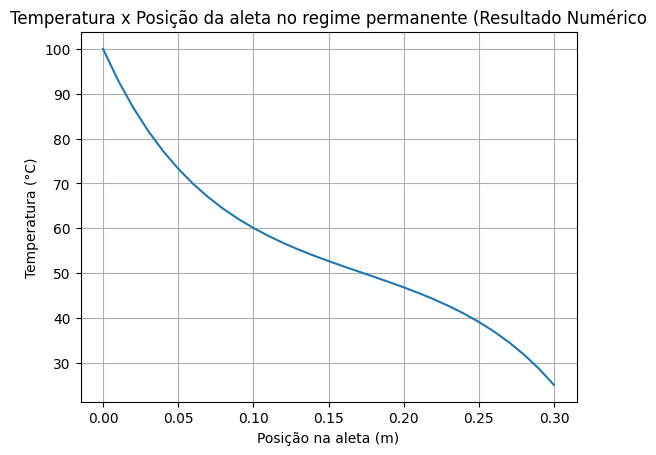

In [26]:
plt.plot(np.arange(0, L+delta_x, delta_x), T[:,trp])
plt.grid()
plt.title('Temperatura x Posição da aleta no regime permanente (Resultado Numérico')
plt.xlabel('Posição na aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.show()

A condição de contorno na extremidade é especificada (Caso C, Incropera[2008]). Dessa forma, tem-se<br><br>
$\frac{\theta}{\theta_b} = \frac{(\theta_L/\theta_b) senh(mx) + senh (m(L-x))}{senh (mL)}$ [Eq. 5] <br><br>
Em que:<br><br>
$\theta  \equiv T-T_ \infty$ <br><br>
$\theta_b = T_b - T_ \infty$<br><br>
$\theta_L = T_L - T_\infty$<br><br>
$m^2  \equiv  \frac{hP}{kA_{tr}}$<br><br>
Pode-se reescrever a Eq. 5 de forma a isolar a temperatura T, obtendo-se:

$T = T_{\infty} + \theta_b \frac{(\theta_L/\theta_b) senh(mx) + senh (m(L-x))}{senh (mL)}$

___

### Questão 3

[2,0 pontos] Apresente um gráfico (Temperatura x Posição) com o resultado analítico. Compare o resultado do item 2 com o obtido para o comportamento analítico da temperatura na aleta. Use as mesmas condições definidas no item 2. 

In [27]:
# Criando matriz de tamanho adequado e preenchendo com condições de contorno
T_2 = np.zeros(passos_comprimento)
T_2[0] = T_base
T_2[passos_comprimento -1] = T_L

theta_b = T_base - T_inf
theta_L = T_L - T_inf
m = sqrt((h * P) / (k * Atr))

lista_x = np.arange(0, L+delta_x, delta_x)
i = 1
while i < len(lista_x) - 1:
    x = lista_x[i]
    T_2[i] = T_inf + theta_b * ((theta_L/ theta_b)*sinh(m*x) + sinh(m*(L-x)))/sinh(m*L)
    i += 1

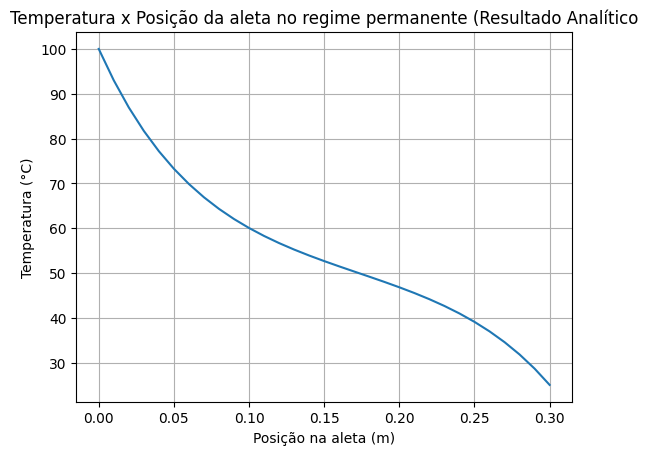

In [28]:
plt.plot(np.arange(0, L+delta_x, delta_x), T_2)
plt.grid()
plt.title('Temperatura x Posição da aleta no regime permanente (Resultado Analítico')
plt.xlabel('Posição na aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.show()

Comparação dos resultados numérico e analítico

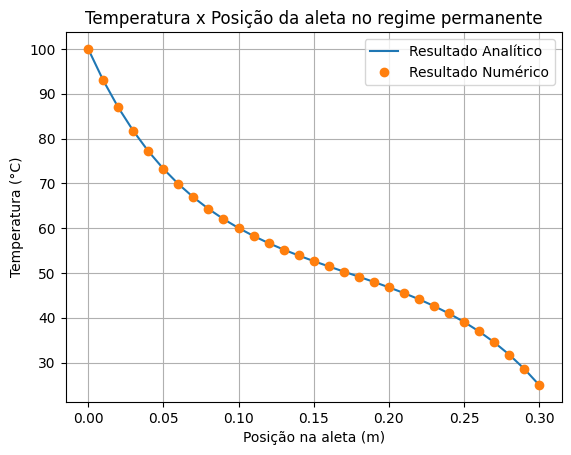

In [29]:
# Análise Gráfica
plt.plot(np.arange(0, L+delta_x, delta_x), T_2, label = 'Resultado Analítico')
plt.plot(np.arange(0, L+delta_x, delta_x), T[:,trp], 'o', label = 'Resultado Numérico')
plt.grid()
plt.legend()
plt.title('Temperatura x Posição da aleta no regime permanente')
plt.xlabel('Posição na aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.show()

Observa-se que os resultados são semelhantes para os dois métodos. Analisando numericamente:

In [30]:
soma_dif = 0
for i in range(len(T_2)):
    delta = (T_2[i] - T[i,trp])/T[i,trp]
    print(delta)
    soma_dif += delta
print(f'A diferença relativa média foi de {delta/len(T_2)}')


0.0
-6.044604602156304e-05
-0.00011038849849887773
-0.0001501304538064411
-0.00018017054639311226
-0.0002011704610304249
-0.0002139148829783682
-0.0002192680971580184
-0.0002181313110587032
-0.0002114041115150514
-0.00019995248285257066
-0.0001845847405050689
-0.00016603576211252246
-0.0001449591514837563
-0.00012192650387392536
-9.743275142660368e-05
-7.190662103650685e-05
-4.572549144658908e-05
-1.9234364344664874e-05
7.2307277524605114e-06
3.3313702529069265e-05
5.8601370229232854e-05
8.257392745579033e-05
0.00010453522328226558
0.00012350891011276126
0.00013807483286239406
0.00014609594493143486
0.00014423331057316456
0.00012702150342690138
8.494801289162996e-05
0.0
A diferença relativa média foi de 0.0


Mostrando que ambas as análises tem o poder de chegar em um resultado adequado